In [2]:
import datetime
import numpy
import os
from matplotlib import pyplot as plt
import matplotlib

In [3]:
#file paths
s_path = os.path.join(os.path.expanduser('~'), 'Documents', 'Talent Games', 
  'time_vs_commits', 'FB_stocks.txt')
c_path = os.path.join(os.path.expanduser('~'), 'Documents', 'Talent Games', 
  'time_vs_commits', 'FB_commits.txt')

In [4]:
sample_size = 364
start_year = 2017
day_list = []
for i in range (1, sample_size):
    day_list.insert(i, i)
stocks_diff = []
commits_list = []
commits_diff = []
stocks_raw = []
commits_raw = []
values_offset = 1;
with open(s_path) as s:
  stocks_raw = s.readlines()
with open(c_path) as c:
  commits_raw = c.readlines()

In [5]:
#stocks
prev_stock = float(stocks_raw[0].split("\t")[1])
raw_i = 1;
for i in range (0, sample_size):
  line = stocks_raw[raw_i].split("\t")
  date_string = line[0]
  stock = float(line[1])
  dt = datetime.datetime.strptime(date_string,"%Y-%m-%d")
  dt0 = datetime.datetime(start_year, 2, 1)
  day_of_year = (dt - dt0).days
  if i == day_of_year:
    stocks_diff.insert(i, stock-prev_stock)
    prev_stock = stock
    raw_i+=1
  else:
    stocks_diff.insert(i, 0)
stocks_diff.remove(0)

In [6]:
#commits
for i in range (0, sample_size):
  line = commits_raw[i].split("\t")
  date_string = line[0]
  commits = float(line[1])
  dt = datetime.datetime.strptime(date_string,"%Y-%m-%d")
  dt0 = datetime.datetime(start_year, 2, 1)
  day_of_year = (dt - dt0).days
  if i == day_of_year :
    commits_list.insert(i, commits)
  else:
    commits_list.insert(i, 0)
#filling differences list
for i in range (1, len(commits_list)):
    commits_diff.append(commits_list[i]- commits_list[i-1])

In [7]:
#calculating correlation coefficients
coeff_list = []
for values_offset in range (0, 10):
    rel_matrix = numpy.corrcoef(commits_diff[1+values_offset:],stocks_diff[1:len(stocks_diff)-values_offset])
    print("offset "+str(values_offset)+": "+str(rel_matrix[0,1]))
    coeff_list.append(rel_matrix[0,1])

offset 0: 0.030910781356954683
offset 1: 0.005057522385180253
offset 2: -0.033816812480805376
offset 3: -0.004465086114923112
offset 4: -0.0017944432418314491
offset 5: 0.022977190966457645
offset 6: -0.013699245011291966
offset 7: 0.03344239015009619
offset 8: -0.061241104755693034
offset 9: 0.02957219660553759


No handles with labels found to put in legend.


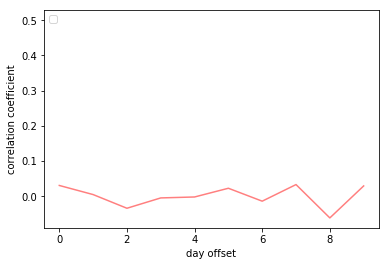

In [8]:
#graphing
offset_list = [0,1,2,3,4,5,6,7,8,9]
#plt.plot(day_list, stocks_diff, 10, c="red", alpha=0.5)
#plt.xlabel("Day of the Year")
#plt.ylabel("Change in stocks")
plt.plot(offset_list, coeff_list, 0.5, c="red", alpha=0.5)
plt.xlabel("day offset")
plt.ylabel("correlation coefficient")
plt.legend(loc=2)
plt.show()